In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools

import sys

In [4]:
filelist = os.listdir('/eos/user/c/camontan/lhc_dynamic_data/')

In [5]:
# filter the files that follow the pattern "stability_bX_s_Y_zeta_Z.h5" where X is the bunch number, Y is the seed and Z is either min, avg or max
filelist = [f for f in filelist if f.startswith('stability_b') and f.endswith('.h5')]
filelist = [f for f in filelist if "_s_" in f and "_zeta_" in f and "min" in f and "b1" in f]

# sort the files by bunch number
filelist.sort(key=lambda f: int(f.split('_')[3]))
print(filelist)

['stability_b1_s_1_zeta_min.h5', 'stability_b1_s_2_zeta_min.h5', 'stability_b1_s_3_zeta_min.h5', 'stability_b1_s_4_zeta_min.h5', 'stability_b1_s_5_zeta_min.h5', 'stability_b1_s_6_zeta_min.h5', 'stability_b1_s_7_zeta_min.h5', 'stability_b1_s_8_zeta_min.h5', 'stability_b1_s_9_zeta_min.h5', 'stability_b1_s_10_zeta_min.h5', 'stability_b1_s_11_zeta_min.h5', 'stability_b1_s_12_zeta_min.h5', 'stability_b1_s_13_zeta_min.h5', 'stability_b1_s_14_zeta_min.h5', 'stability_b1_s_15_zeta_min.h5', 'stability_b1_s_16_zeta_min.h5', 'stability_b1_s_17_zeta_min.h5', 'stability_b1_s_18_zeta_min.h5', 'stability_b1_s_19_zeta_min.h5', 'stability_b1_s_20_zeta_min.h5', 'stability_b1_s_21_zeta_min.h5', 'stability_b1_s_22_zeta_min.h5', 'stability_b1_s_23_zeta_min.h5', 'stability_b1_s_24_zeta_min.h5', 'stability_b1_s_25_zeta_min.h5', 'stability_b1_s_26_zeta_min.h5', 'stability_b1_s_27_zeta_min.h5', 'stability_b1_s_28_zeta_min.h5', 'stability_b1_s_29_zeta_min.h5', 'stability_b1_s_30_zeta_min.h5', 'stability_b1_s_31

In [6]:
f = h5py.File('/eos/user/c/camontan/lhc_dynamic_data/' + filelist[0], 'r')

In [7]:
f["stability"]

<HDF5 dataset "stability": shape (90000,), type "<i8">

In [8]:
n_stables = []

for i, f in enumerate(tqdm(filelist)):
    # open the file
    with h5py.File('/eos/user/c/camontan/lhc_dynamic_data/' + f, 'r') as hf:
        # get the data
        data = hf["stability"][:]
    
    n_stables.append(np.count_nonzero(data==10**6))
    plt.figure(figsize=(10, 10))
    plt.imshow(np.log10(data).reshape(300, 300))
    plt.colorbar()
    plt.title(f)
    plt.savefig("../img/borders/bunch_" + str(i) + ".jpg")
    plt.close()

100%|██████████| 60/60 [00:35<00:00,  1.69it/s]


In [9]:
idx_max = np.argmax(n_stables)
idx_min = np.argmin(n_stables)

print("Max: ", filelist[idx_max])
print("Min: ", filelist[idx_min])

f_min = h5py.File('/eos/user/c/camontan/lhc_dynamic_data/' + filelist[idx_min], 'r')
f_max = h5py.File('/eos/user/c/camontan/lhc_dynamic_data/' + filelist[idx_max], 'r')

data_min = f_min["stability"][:]
data_max = f_max["stability"][:]

Max:  stability_b1_s_25_zeta_min.h5
Min:  stability_b1_s_33_zeta_min.h5


Text(0.5, 1.0, 'stability_b1_s_33_zeta_min.h5')

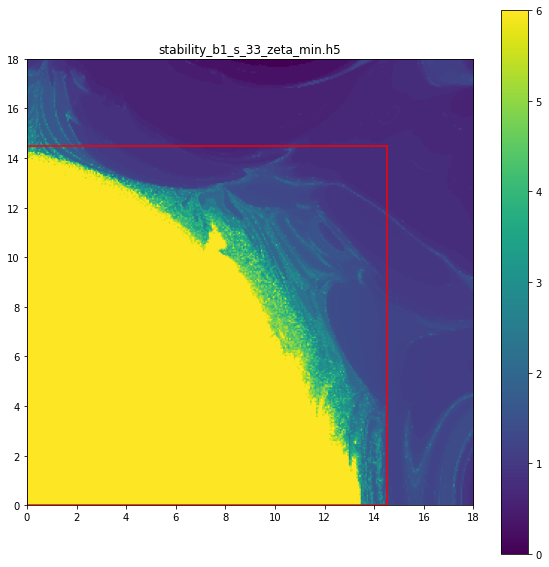

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(np.log10(data_min).reshape(300, 300), origin='lower', extent=[0, 18, 0, 18])
plt.colorbar()
# draw a red rectangle border
border = 14.5
plt.plot([0, border], [0, 0], 'r')
plt.plot([0, 0], [0, border], 'r')
plt.plot([0, border], [border, border], 'r')
plt.plot([border, border], [0, border], 'r')

plt.title(filelist[idx_min])

Text(0.5, 1.0, 'stability_b1_s_25_zeta_min.h5')

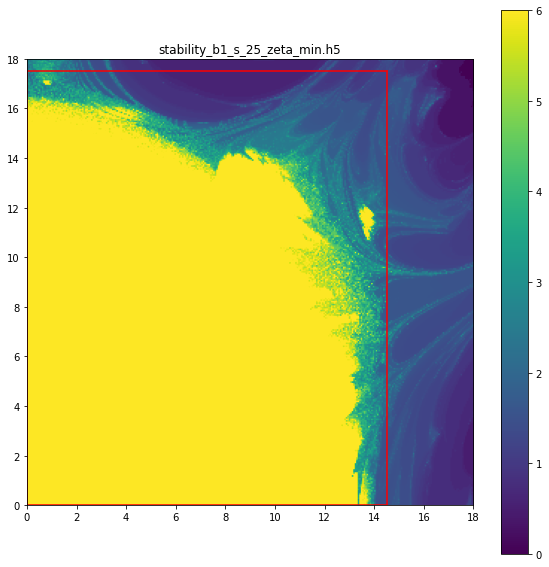

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(np.log10(data_max).reshape(300, 300), origin='lower', extent=[0, 18, 0, 18])
plt.colorbar()
# draw a red rectangle border
border_x = 15.0
border_y = 17.5
plt.plot([0, border_x], [0, 0], 'r')
plt.plot([0, 0], [0, border_y], 'r')
plt.plot([0, border_x], [border_y, border_y], 'r')
plt.plot([border_x, border_x], [0, border_y], 'r')
plt.title(filelist[idx_max])